In [18]:
import pandas as pd                       
import datetime as dt                     
import yfinance as yf                    
import seaborn as sns
import scipy.stats as st
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
from sklearn.svm import SVR            
                                          # Integrate algorithms
from sklearn.ensemble im ㄏport RandomForestRegressor
from xgboost import XGBRegressor

In [19]:
actual_date = dt.date.today()                            # Take the actual date
last_month_date = actual_date-dt.timedelta(days=600) 
actual_date = actual_date.strftime("%Y-%m-%d") 
last_month_date = last_month_date.strftime("%Y-%m-%d")

stock='AAPL'                                               # Stock name
data = yf.download(stock, last_month_date, actual_date)  # Getting data from Yahoo Finance
da= pd.DataFrame(data=data)
da.to_csv('file.csv')
df = pd.read_csv('./file.csv')
print(df)

[*********************100%***********************]  1 of 1 completed
                          Date        Open        High         Low  \
0    2021-03-18 00:00:00-04:00  122.879997  123.180000  120.320000   
1    2021-03-19 00:00:00-04:00  119.900002  121.430000  119.680000   
2    2021-03-22 00:00:00-04:00  120.330002  123.870003  120.260002   
3    2021-03-23 00:00:00-04:00  123.330002  124.239998  122.139999   
4    2021-03-24 00:00:00-04:00  122.820000  122.900002  120.070000   
..                         ...         ...         ...         ...   
410  2022-11-01 00:00:00-04:00  155.080002  155.449997  149.130005   
411  2022-11-02 00:00:00-04:00  148.949997  152.169998  145.000000   
412  2022-11-03 00:00:00-04:00  142.059998  142.800003  138.750000   
413  2022-11-04 00:00:00-04:00  142.089996  142.669998  134.380005   
414  2022-11-07 00:00:00-05:00  137.110001  139.149994  135.669998   

          Close   Adj Close     Volume  
0    120.529999  119.278244  121229700  
1    119

In [20]:
x = df[['High', 'Low', 'Open', 'Volume']].values  # x features
y = df['Close'].values   
print("x=")
print(x)
print("y=")
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28) # Segment the data

x=
[[1.23180000e+02 1.20320000e+02 1.22879997e+02 1.21229700e+08]
 [1.21430000e+02 1.19680000e+02 1.19900002e+02 1.85549500e+08]
 [1.23870003e+02 1.20260002e+02 1.20330002e+02 1.11912300e+08]
 ...
 [1.42800003e+02 1.38750000e+02 1.42059998e+02 9.79185000e+07]
 [1.42669998e+02 1.34380005e+02 1.42089996e+02 1.40716700e+08]
 [1.39149994e+02 1.35669998e+02 1.37110001e+02 8.32381000e+07]]
y=
[120.52999878 119.98999786 123.38999939 122.54000092 120.08999634
 120.58999634 121.20999908 121.38999939 119.90000153 122.15000153
 123.         125.90000153 126.20999908 127.90000153 130.36000061
 133.         131.24000549 134.42999268 132.02999878 134.5
 134.16000366 134.83999634 133.11000061 133.5        131.94000244
 134.32000732 134.72000122 134.38999939 133.58000183 133.47999573
 131.46000671 132.53999329 127.84999847 128.1000061  129.74000549
 130.21000671 126.84999847 125.91000366 122.76999664 124.97000122
 127.44999695 126.26999664 124.84999847 124.69000244 127.30999756
 125.43000031 127.09999

In [21]:
print((x_test[:,0]))

[157.25999451 151.99000549 176.6499939  148.44999695 149.75
 168.88000488 124.84999847 130.88999939 151.74000549 166.6000061
 158.74000549 149.83000183 141.78999329 169.58000183 130.6000061
 134.32000732 147.71000671 147.38000488 127.63999939 149.44000244
 162.41000366 156.11000061 165.41999817 126.93000031 174.8999939
 165.52000427 149.69999695 155.57000732 159.44000244 148.94999695
 121.48000336 142.8999939  172.63999939 141.91000366 167.19000244
 179.22999573 141.3500061  148.97000122 167.88000488 143.07000732
 127.94000244 150.83999634 134.66999817 149.94000244 149.72999573
 146.72000122 166.33000183 164.96000671 142.91999817 148.57000732
 155.57000732 135.         160.36000061 151.27000427 149.16999817
 179.61000061 160.53999329 148.72000122 173.94999695 133.08000183
 124.18000031 175.47999573 137.33000183 144.80999756 128.32000732
 148.82000732 150.86000061 177.74000549 175.3500061  173.38999939
 149.57000732 147.53999329 159.78999329 130.38999939 165.11999512
 140.66999817 137.4

In [22]:
ss = StandardScaler()                                 # Standardize the data set
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train[0:100]

array([[-0.59685401, -0.78472708, -0.56819572, -0.82144922],
       [-0.60720321, -0.76268317, -0.85245429,  1.14652337],
       [ 0.59198351,  0.66755754,  0.6755953 ,  0.30387208],
       [ 0.64114073,  0.5780425 ,  0.74174811, -0.40087745],
       [-0.36012123, -0.22893123, -0.27214913, -0.90869722],
       [ 1.58677696,  1.72036481,  1.65805317, -0.52138167],
       [-0.33554212, -0.36320378, -0.44375145,  0.48982396],
       [ 0.98136354,  0.99154983,  0.93103495, -0.79656341],
       [-0.7139265 , -0.81078102, -0.85376351, -0.57778277],
       [-1.71389505, -1.65716743, -1.71767163,  0.68545193],
       [ 1.43542361,  1.55269001,  1.51985406, -0.07804196],
       [ 0.66313204,  0.71832805,  0.67756014, -0.57932939],
       [ 0.85200149,  0.94745997,  0.86553776, -0.97486379],
       [-1.58194571, -1.5449393 , -1.55785882, -0.66200749],
       [-0.16284391, -0.08129736, -0.05142292, -0.89513904],
       [-0.67511749, -0.72126496, -0.59243036,  0.3924763 ],
       [-0.41574695, -0.

In [47]:
#Set the model name.
names = ['LinerRegression',
       'Ridge',
       'Lasso',
       'Random Forrest',
       'Support Vector Regression',
       'ElasticNet',
       'XgBoost']

#Define the model.
# cv is the cross-validation idea here.
models = [LinearRegression(),
         RidgeCV(alphas=(0.001,0.1,1),cv=3),
         LassoCV(alphas=(0.001,0.1,1),cv=5),
         RandomForestRegressor(n_estimators=10),
         SVR(),
         ElasticNet(alpha=0.001,max_iter=10000),
         XGBRegressor()]
# Output the R2 scores of all regression models.

#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):
        model_fitted = model.fit(x_train,y_train)
        y_pred = model_fitted.predict(x_test)
        score = r2_score(y_test, y_pred)
        return score
%matplotlib inline
#Traverse all models to score.
x = []
y = []
for name,model in zip(names,models):
        score = R2(model,x_train, x_test, y_train, y_test)
        print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))
        x.append(name)
        y.append(score.mean())

LinerRegression: 0.996029, 0.0000
Ridge: 0.996030, 0.0000
Lasso: 0.996047, 0.0000
Random Forrest: 0.990257, 0.0000
Support Vector Regression: 0.961463, 0.0000
ElasticNet: 0.996155, 0.0000
XgBoost: 0.988463, 0.0000


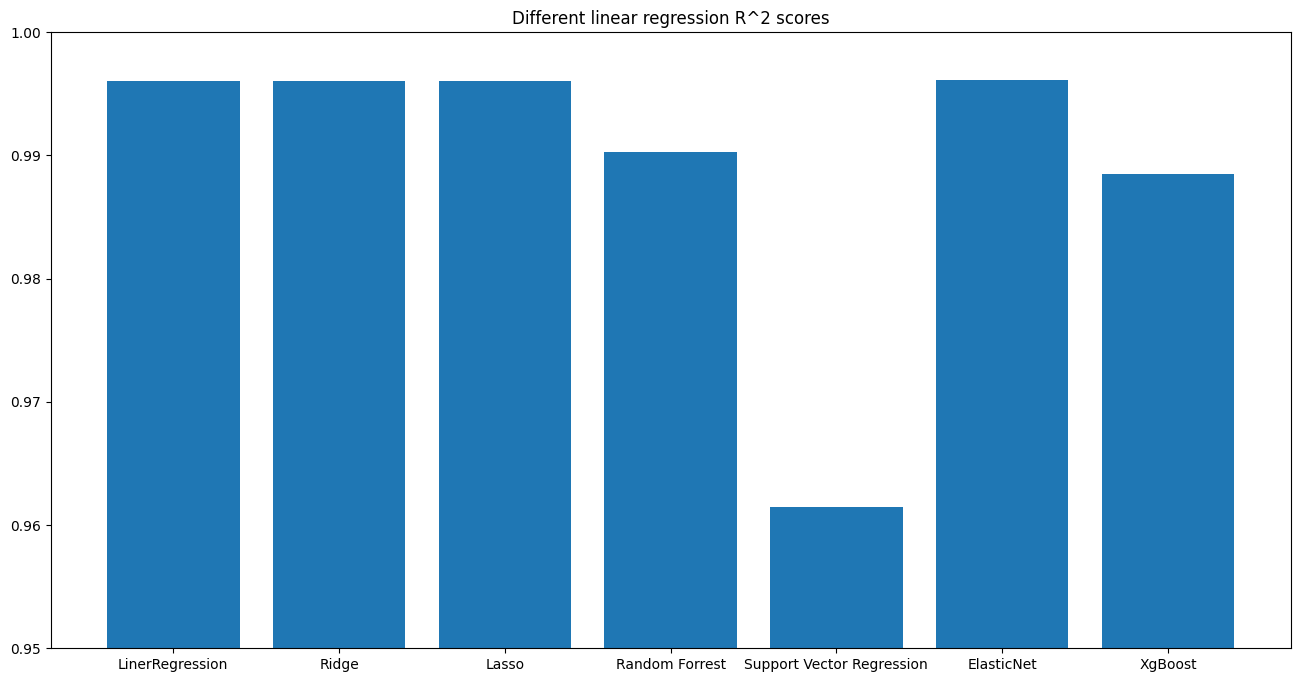

In [60]:
plt.figure(figsize=(16,8))
plt.ylim(0.95,1)
plt.bar(x,y)
plt.title(u"Different linear regression R^2 scores")
plt.show()

In [62]:
#Build a model.
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
   'kernel': ['linear', 'rbf'],
   'C': [0.1, 0.5,0.9,1,5],
   'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [64]:
##Obtain optimal parameters.
print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model.best_estimator_)
print("Optimal R2 value:", model.best_score_)

Optimal parameter list: {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}
Optimal model: SVR(C=5, gamma=0.001, kernel='linear')
Optimal R2 value: 0.9950849132689639


In [65]:
print(x_test)
print(y_test)

[[ 2.98331110e-01  3.55590216e-01  2.72787978e-01 -2.30978556e-01]
 [-4.25371695e-02 -6.86057522e-02  1.01446005e-02 -1.08402434e-03]
 [ 1.55249610e+00  1.72570811e+00  1.65346889e+00 -6.58175912e-01]
 [-2.71508543e-01 -2.68344427e-01 -3.30441594e-01 -4.13211553e-01]
 [-1.87423016e-01 -6.32614339e-02 -1.37879691e-01 -1.15815377e+00]
 [ 1.04992526e+00  1.13784736e+00  1.17599381e+00 -7.88558288e-01]
 [-1.79798058e+00 -1.73265453e+00 -1.71112201e+00 -4.66045327e-01]
 [-1.40730714e+00 -1.37659684e+00 -1.33844333e+00  1.39615626e-01]
 [-5.87074252e-02 -9.26546752e-02 -5.92832618e-02 -5.41534359e-01]
 [ 9.02452612e-01  8.61952914e-01  9.10075369e-01 -1.84498359e-01]
 [ 3.94059734e-01  3.02816729e-01  4.28016001e-01  5.23620323e-01]
 [-1.82248415e-01 -9.13183408e-02 -1.66043004e-01 -6.13522125e-01]
 [-7.02284391e-01 -7.16589319e-01 -8.10536126e-01  1.65562309e-01]
 [ 1.09520178e+00  1.16857592e+00  1.08495275e+00 -7.91455754e-02]
 [-1.42606421e+00 -1.31447105e+00 -1.36660664e+00 -9.89988022e

range(0, 83)


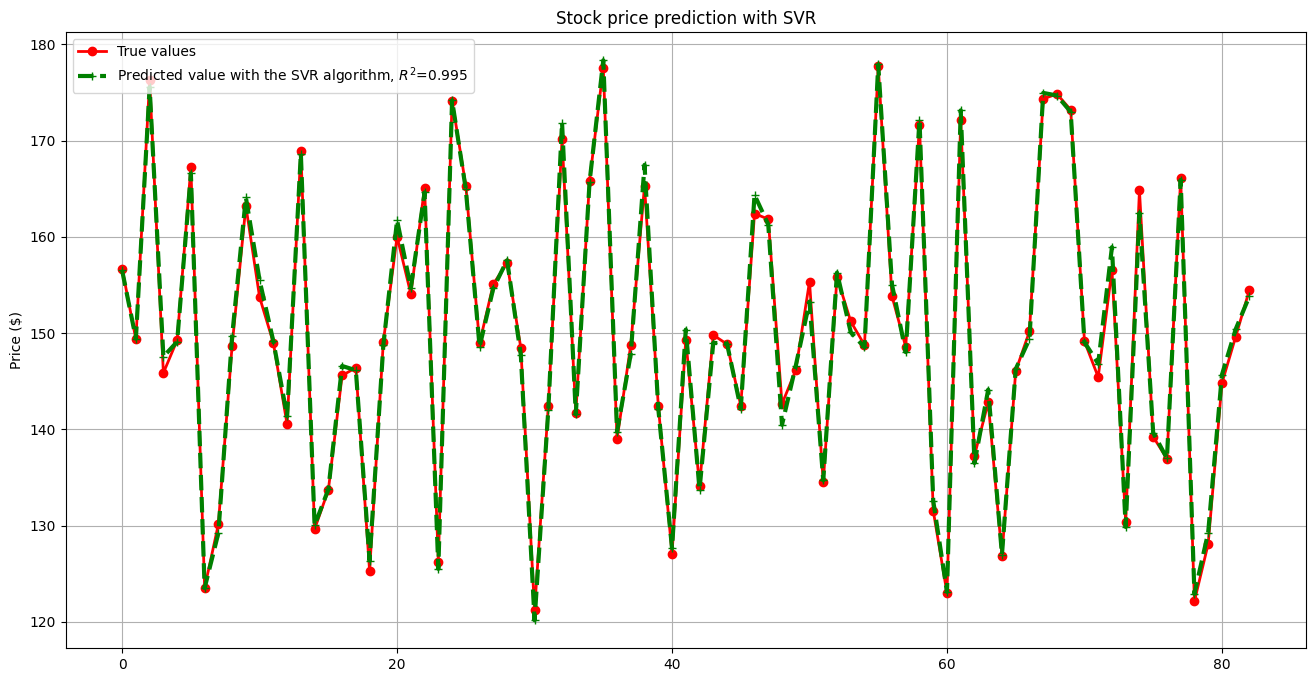

In [67]:
##Perform visualization.
ln_x_test = range(len(x_test))
print(ln_x_test)
y_predict = model.predict(x_test)
#Set the canvas.
plt.figure(figsize=(16,8))
# plt.plot (ln_x_test, x_test[:,0], 'r-o', lw=2, label=u'High Price')
# plt.plot (ln_x_test, x_test[:,1], 'g-o', lw=2, label=u'Low Price')
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'r-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'g--+', lw = 3, label=u'Predicted value with the SVR algorithm, $R^2$=%.3f' % (model.best_score_))
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with SVR")
plt.ylabel('Price ($)')
plt.show()

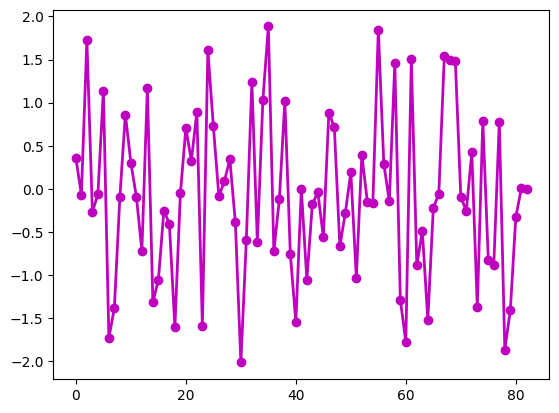

In [28]:
plt.plot (ln_x_test, x_test[:,1], 'm-o', lw=2, label=u'True values')


/var/folders/qw/yn2hs8f11_l_v1ltzl8307r80000gn/T/ipykernel_11993/4273560539.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])


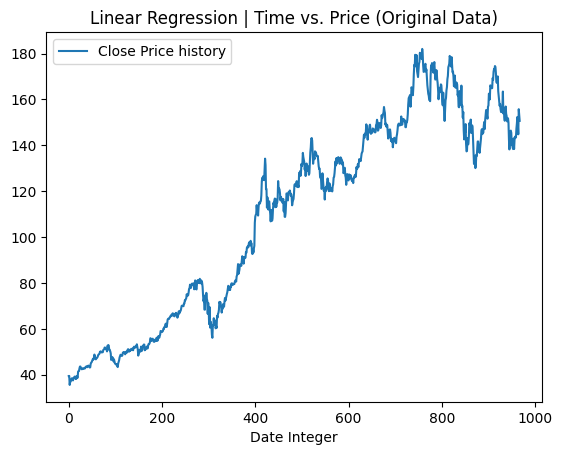

0.9071379617509912
0.9203100607538883
0.9238621765082954
Average Accuracy: 0.9042682182616751
coef_: [[0.1465592]]
intercept_: [38.56754545]


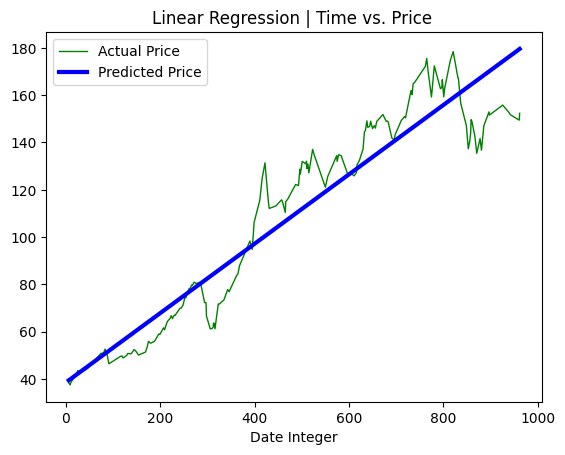

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

df = pd.read_csv('AAPL.csv')
dates = list(range(0,int(len(df))))
prices = df['Close']
#Impute missing values (NaN)
prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])

#Plot Original Data
plt.plot(df['Close'], label='Close Price history')
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Convert to numpy array and reshape them
dates = np.asanyarray(dates)
prices = np.asanyarray(prices)
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(prices, (len(prices), 1))

#Load Pickle File to get the previous saved model accuracy
try:
  pickle_in = open("prediction.pickle", "rb")
  reg = pickle.load(pickle_in)
  xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2)
  best = reg.score(ytrain, ytest)
except:
  pass

#Get the highest accuracy model
best = 0
for _ in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2)
    reg = LinearRegression().fit(xtrain, ytrain)
    acc = reg.score(xtest, ytest)
    if acc > best:
        best = acc
        #Save model to pickle format
        with open('prediction.pickle','wb') as f:
            pickle.dump(reg, f)
        print(acc)

#Load linear regression model
pickle_in = open("prediction.pickle", "rb")
reg = pickle.load(pickle_in)

#Get the average accuracy of the model
mean = 0
for i in range(10):
  #Random Split Data
  msk = np.random.rand(len(df)) < 0.8
  xtest = dates[~msk]
  ytest = prices[~msk]
  mean += reg.score(xtest,ytest)

print("Average Accuracy:", mean/10)

#Plot Predicted VS Actual Data
# plt.figure(figsize=(16,8))
print("coef_:", reg.coef_)
print("intercept_:", reg.intercept_)
plt.plot(xtest, ytest, color='green',linewidth=1, label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, reg.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date Integer')
plt.show()


/Users/lucytuan/anaconda3/envs/CC/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Prices ($)')

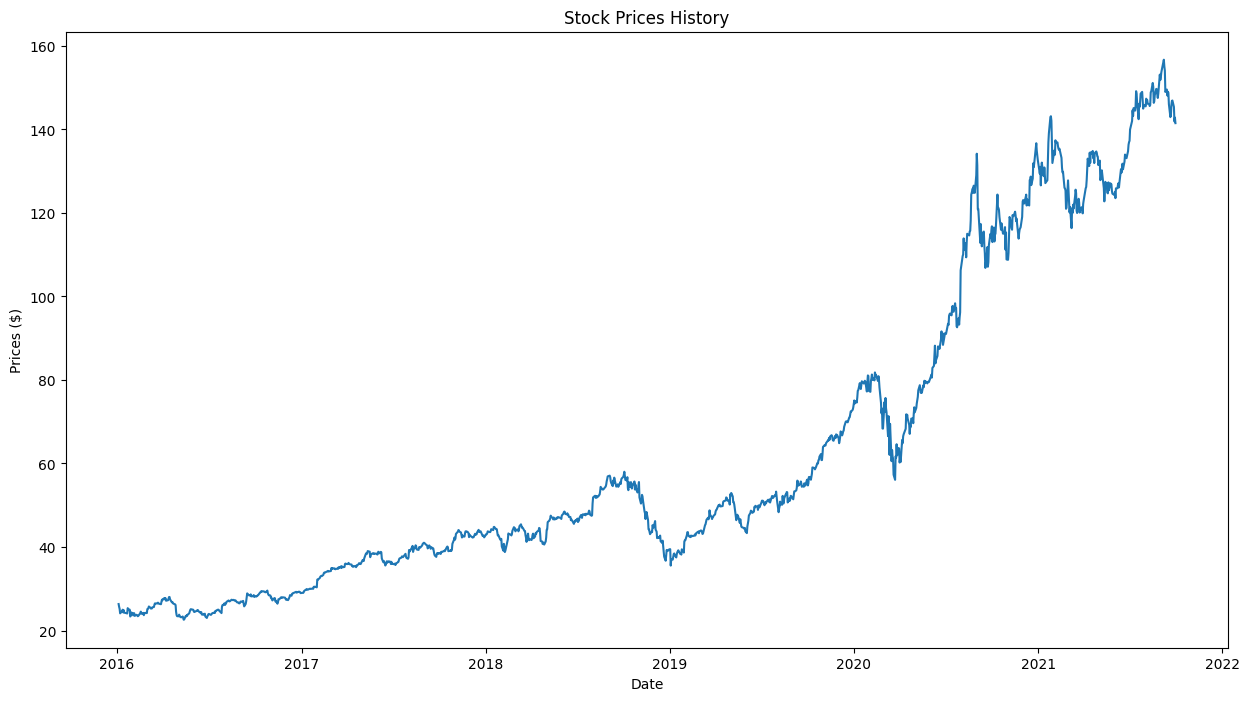

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
import torch
from torch import nn


stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data.head()
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')


In [2]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [3]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = nn.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

In [4]:
# Build model
#####################
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[:, -1, :]) 
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [5]:
# Train model
#####################
num_epochs = 100
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

NameError: name 'look_back' is not defined

In [ ]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [ ]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df_ibm[len(df_ibm)-len(y_test):].index, y_test, color = 'red', label = 'Real IBM Stock Price')
axes.plot(df_ibm[len(df_ibm)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted IBM Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.savefig('ibm_pred.png')
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()